In [1]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="")
project = rf.workspace("augmented-startups").project("playing-cards-ow27d")
version = project.version(4)
dataset = version.download("yolov8")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.6/88.6 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 49.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 75.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 75.3 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Playing-Cards-4 in yolov8:: 100%|██████████| 48478/48478 [00:07<00:00, 6219.04it/s]


In [2]:
!pip install ultralytics opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 61.7 MB/s eta 0:00:00


In [3]:
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
!ls /content/Playing-Cards-4

data.yaml  README.dataset.txt  README.roboflow.txt  test  train  valid


In [10]:
!yolo detect train data=/content/Playing-Cards-4/data.yaml model=yolov8l.pt epochs=50 imgsz=800 save_period=10 optimizer=Adam lr0=0.005 lrf=0.1 batch=32

Ultralytics 8.3.191 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Playing-Cards-4/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8l.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train4, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, p

In [11]:
from google.colab import files

files.download('runs/detect/train4/weights/best.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Displaying: /content/runs/detect/train4/confusion_matrix.png


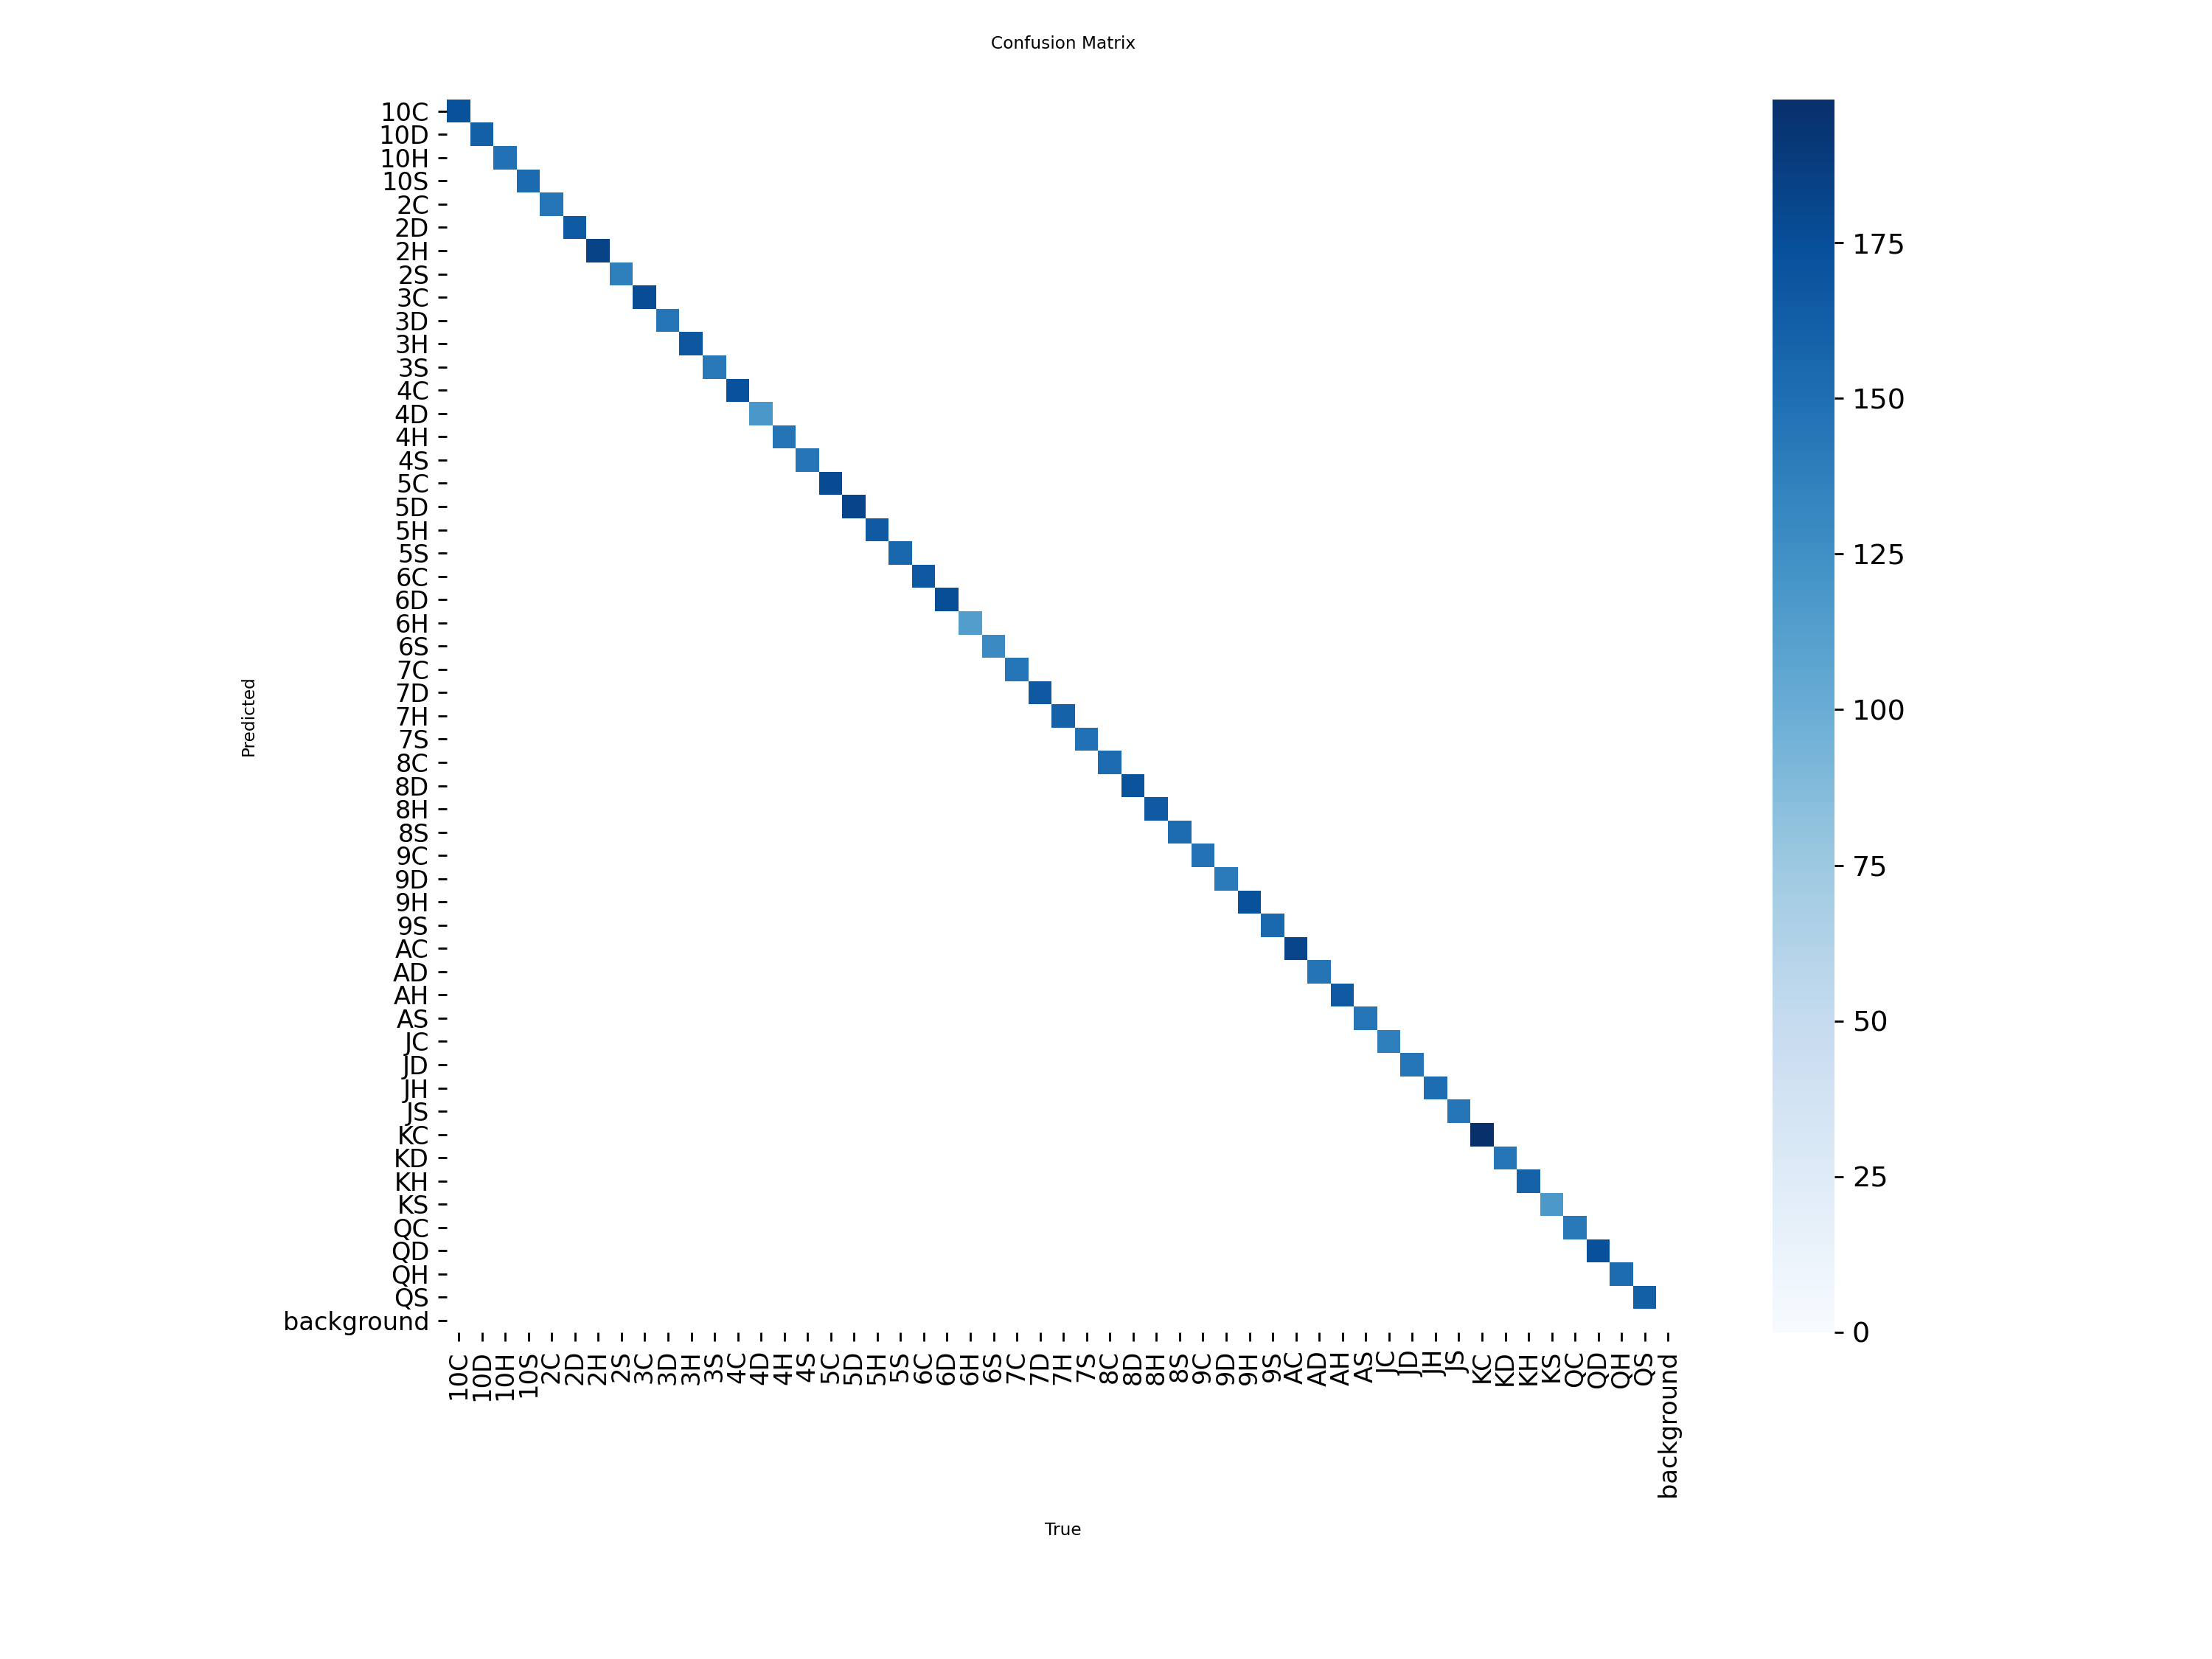

Displaying: /content/runs/detect/train4/results.png


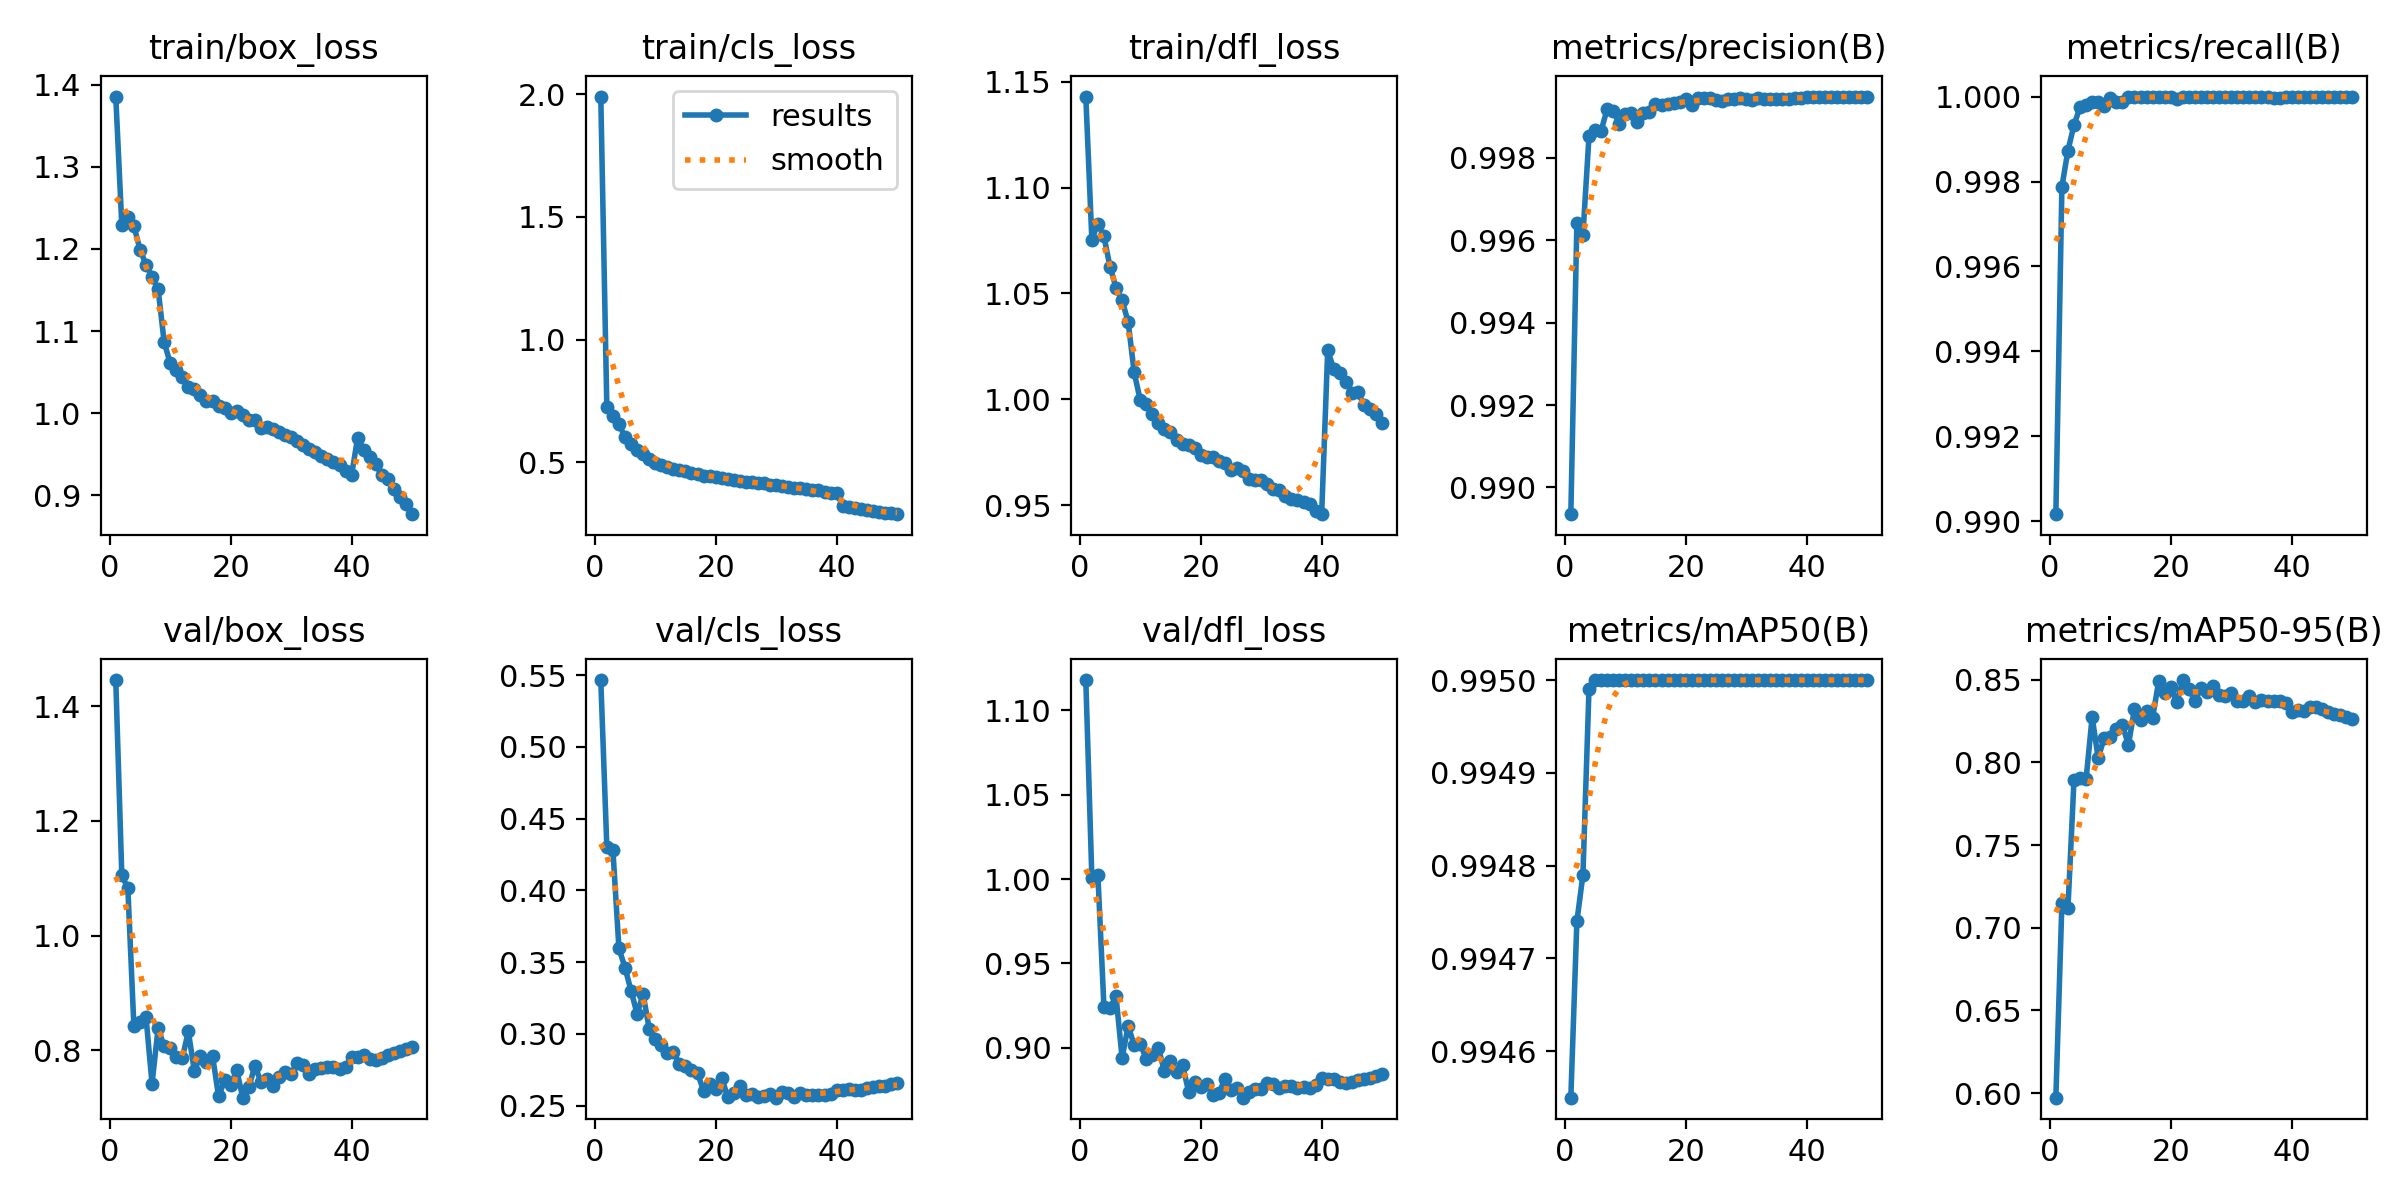

Displaying: /content/runs/detect/train4/BoxF1_curve.png


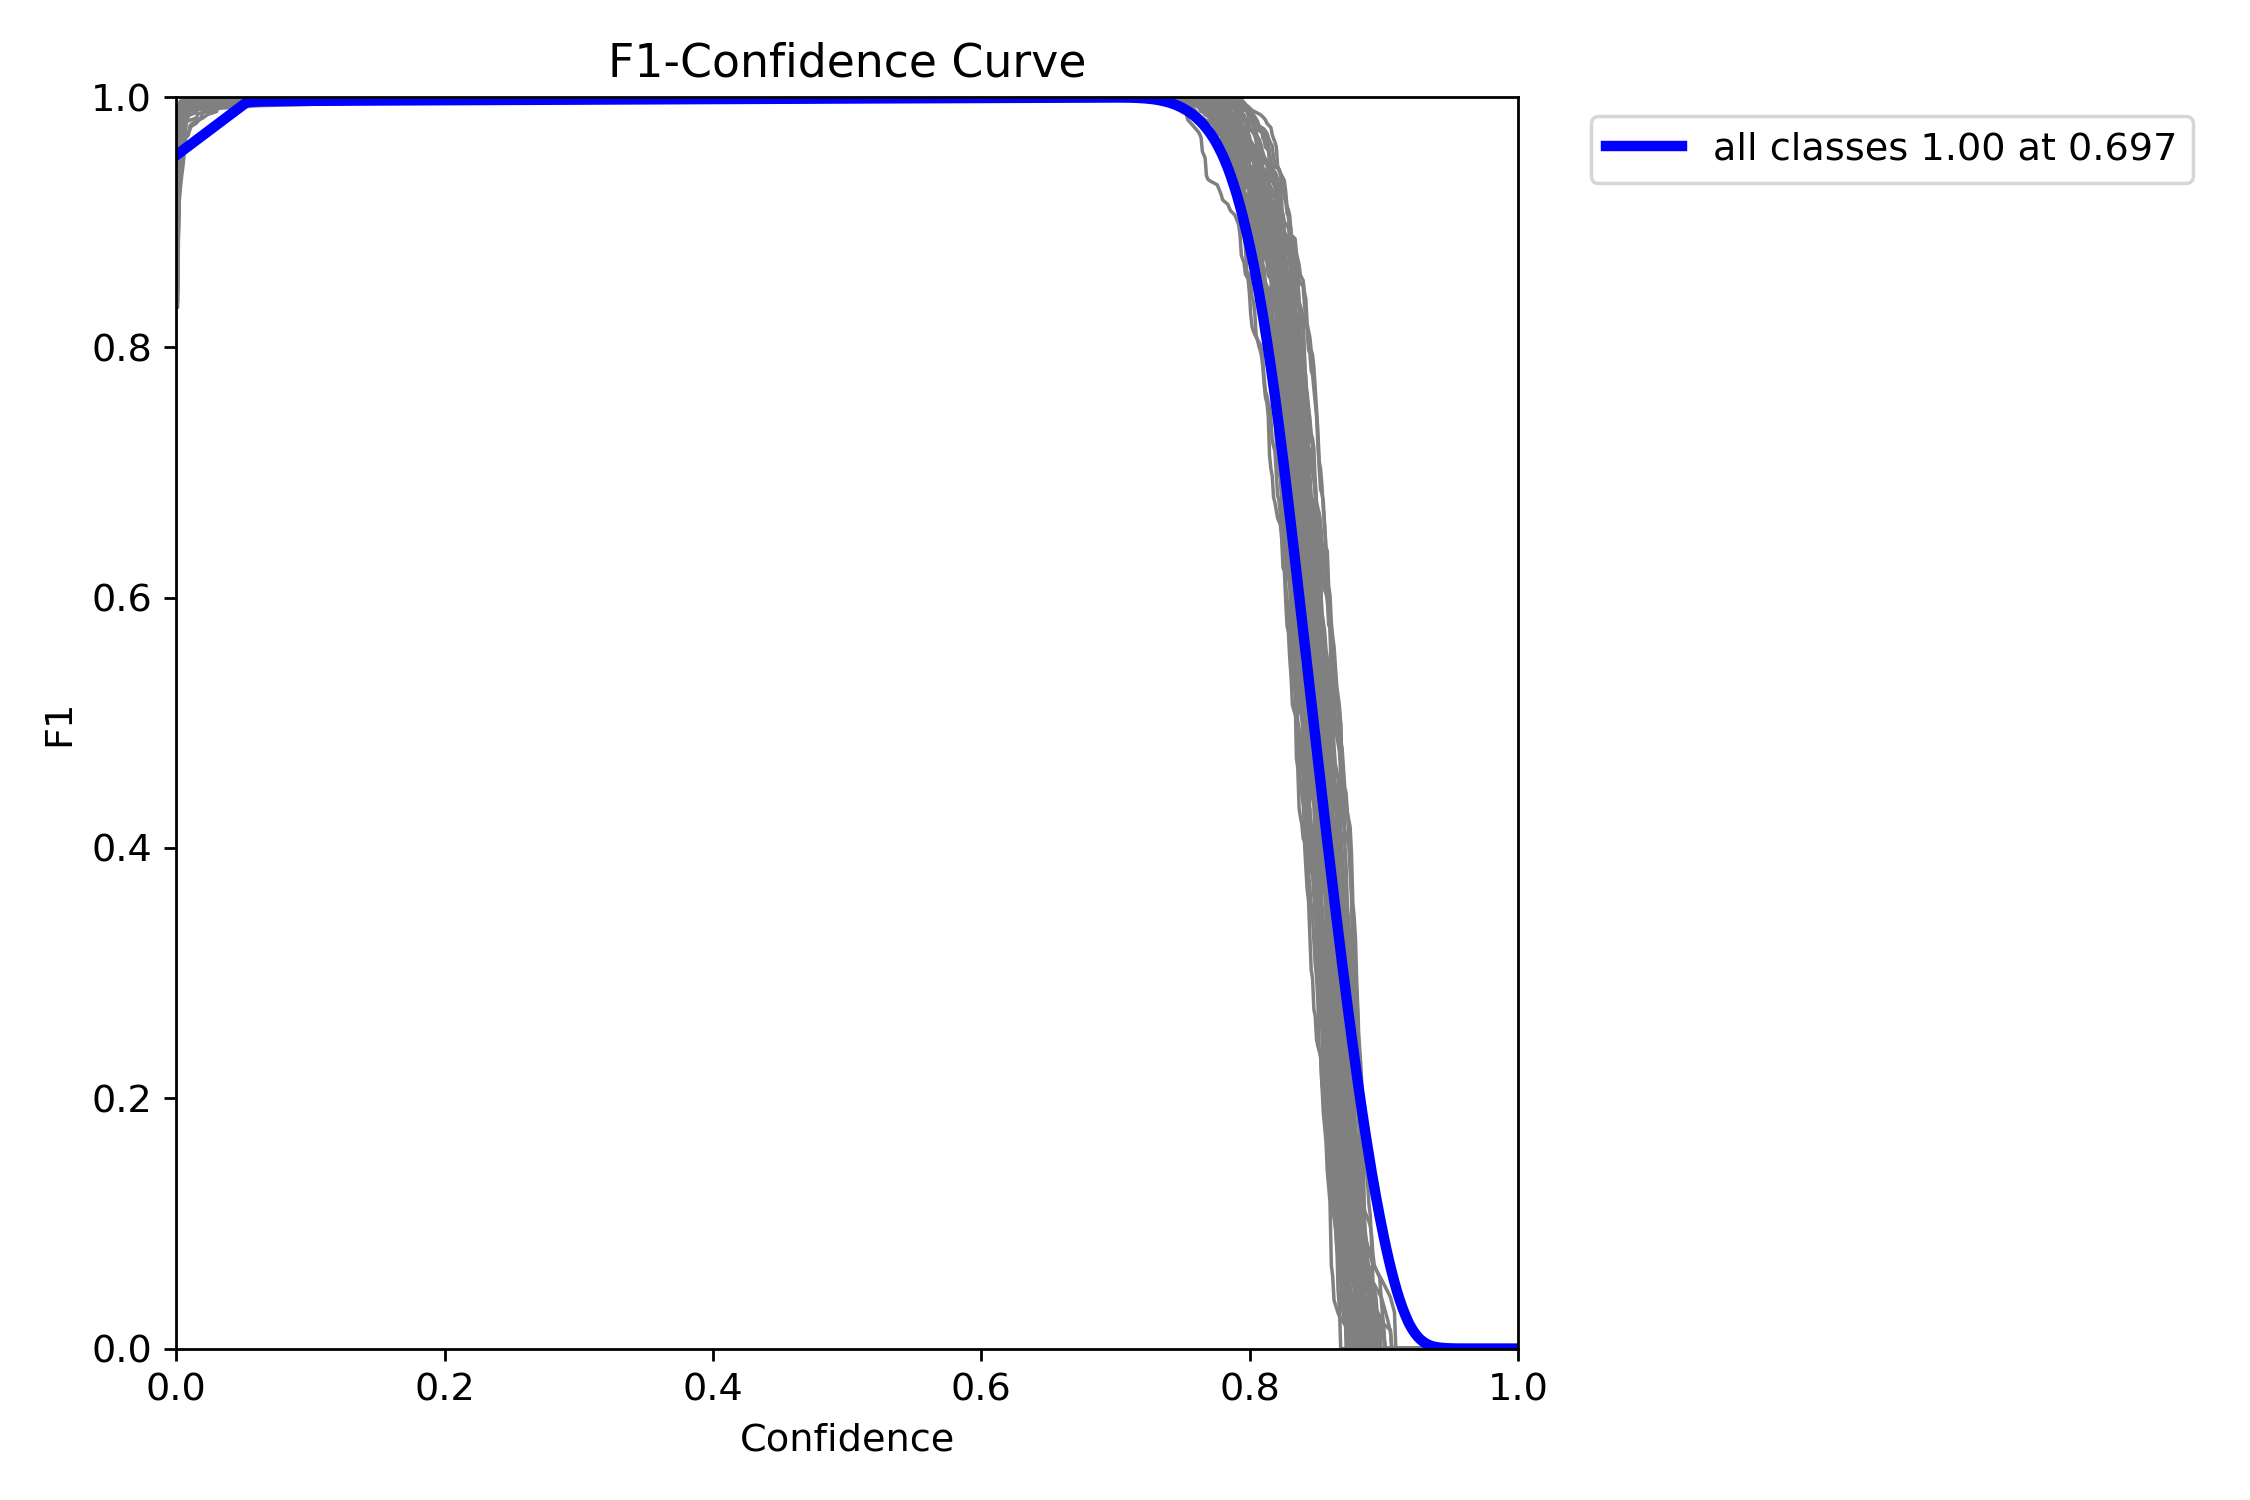

Displaying: /content/runs/detect/train4/BoxPR_curve.png


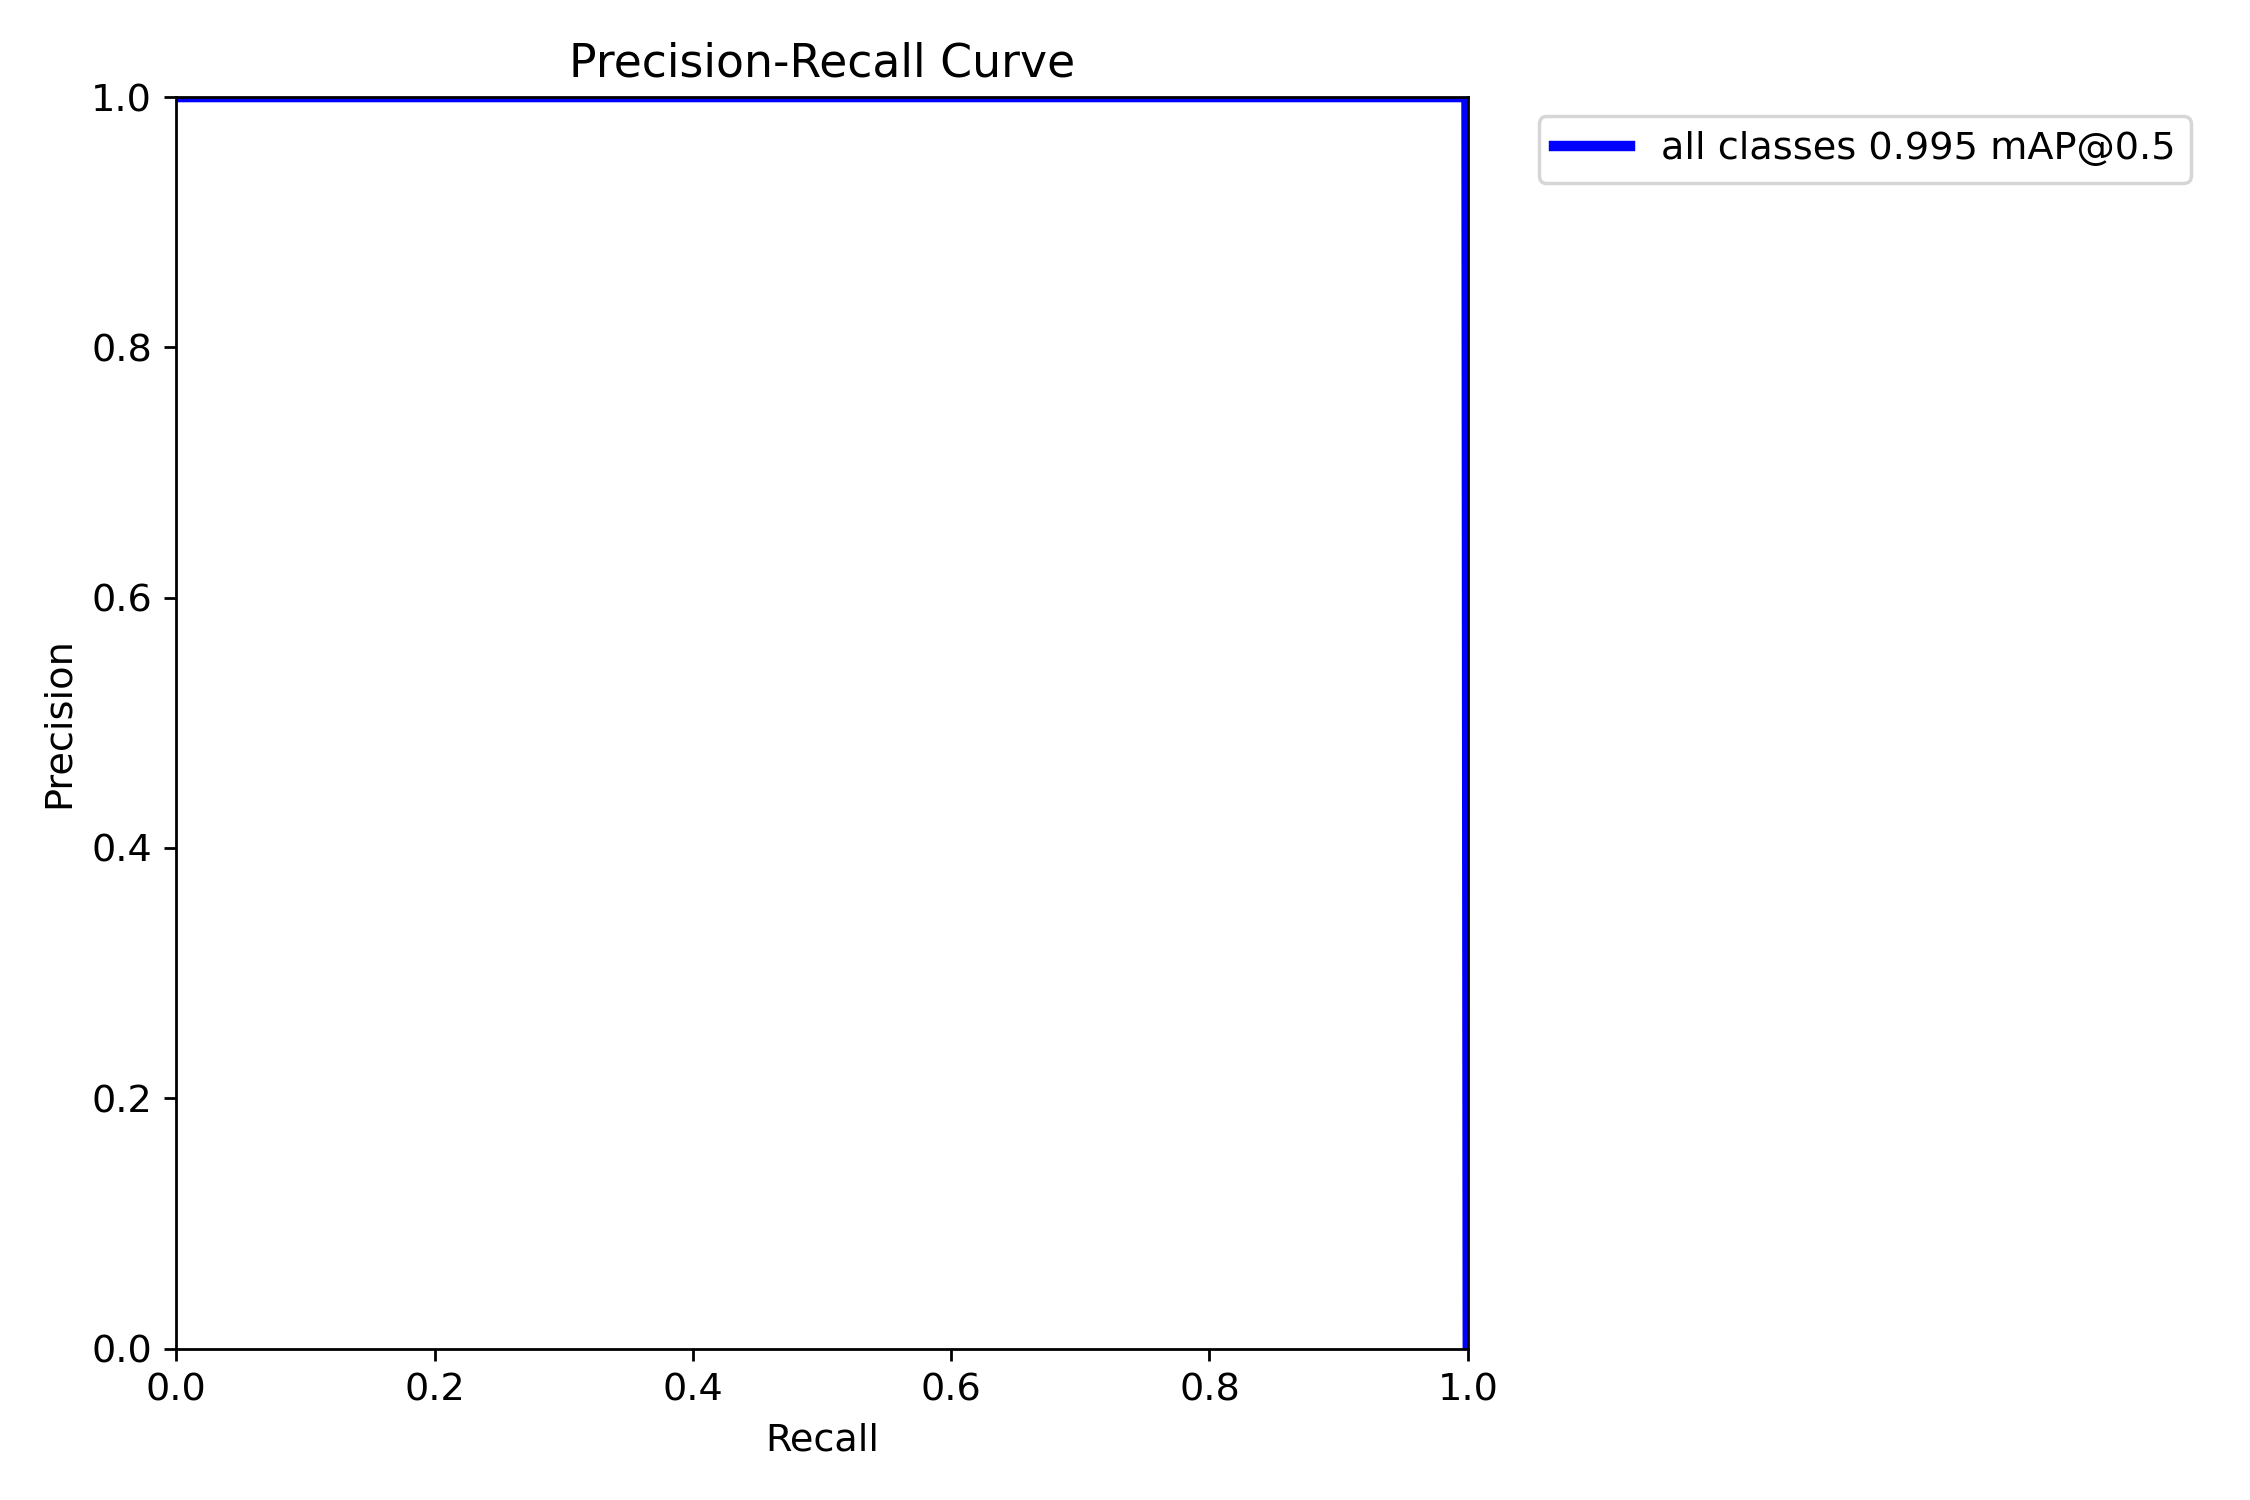

Displaying: /content/runs/detect/train4/labels.jpg


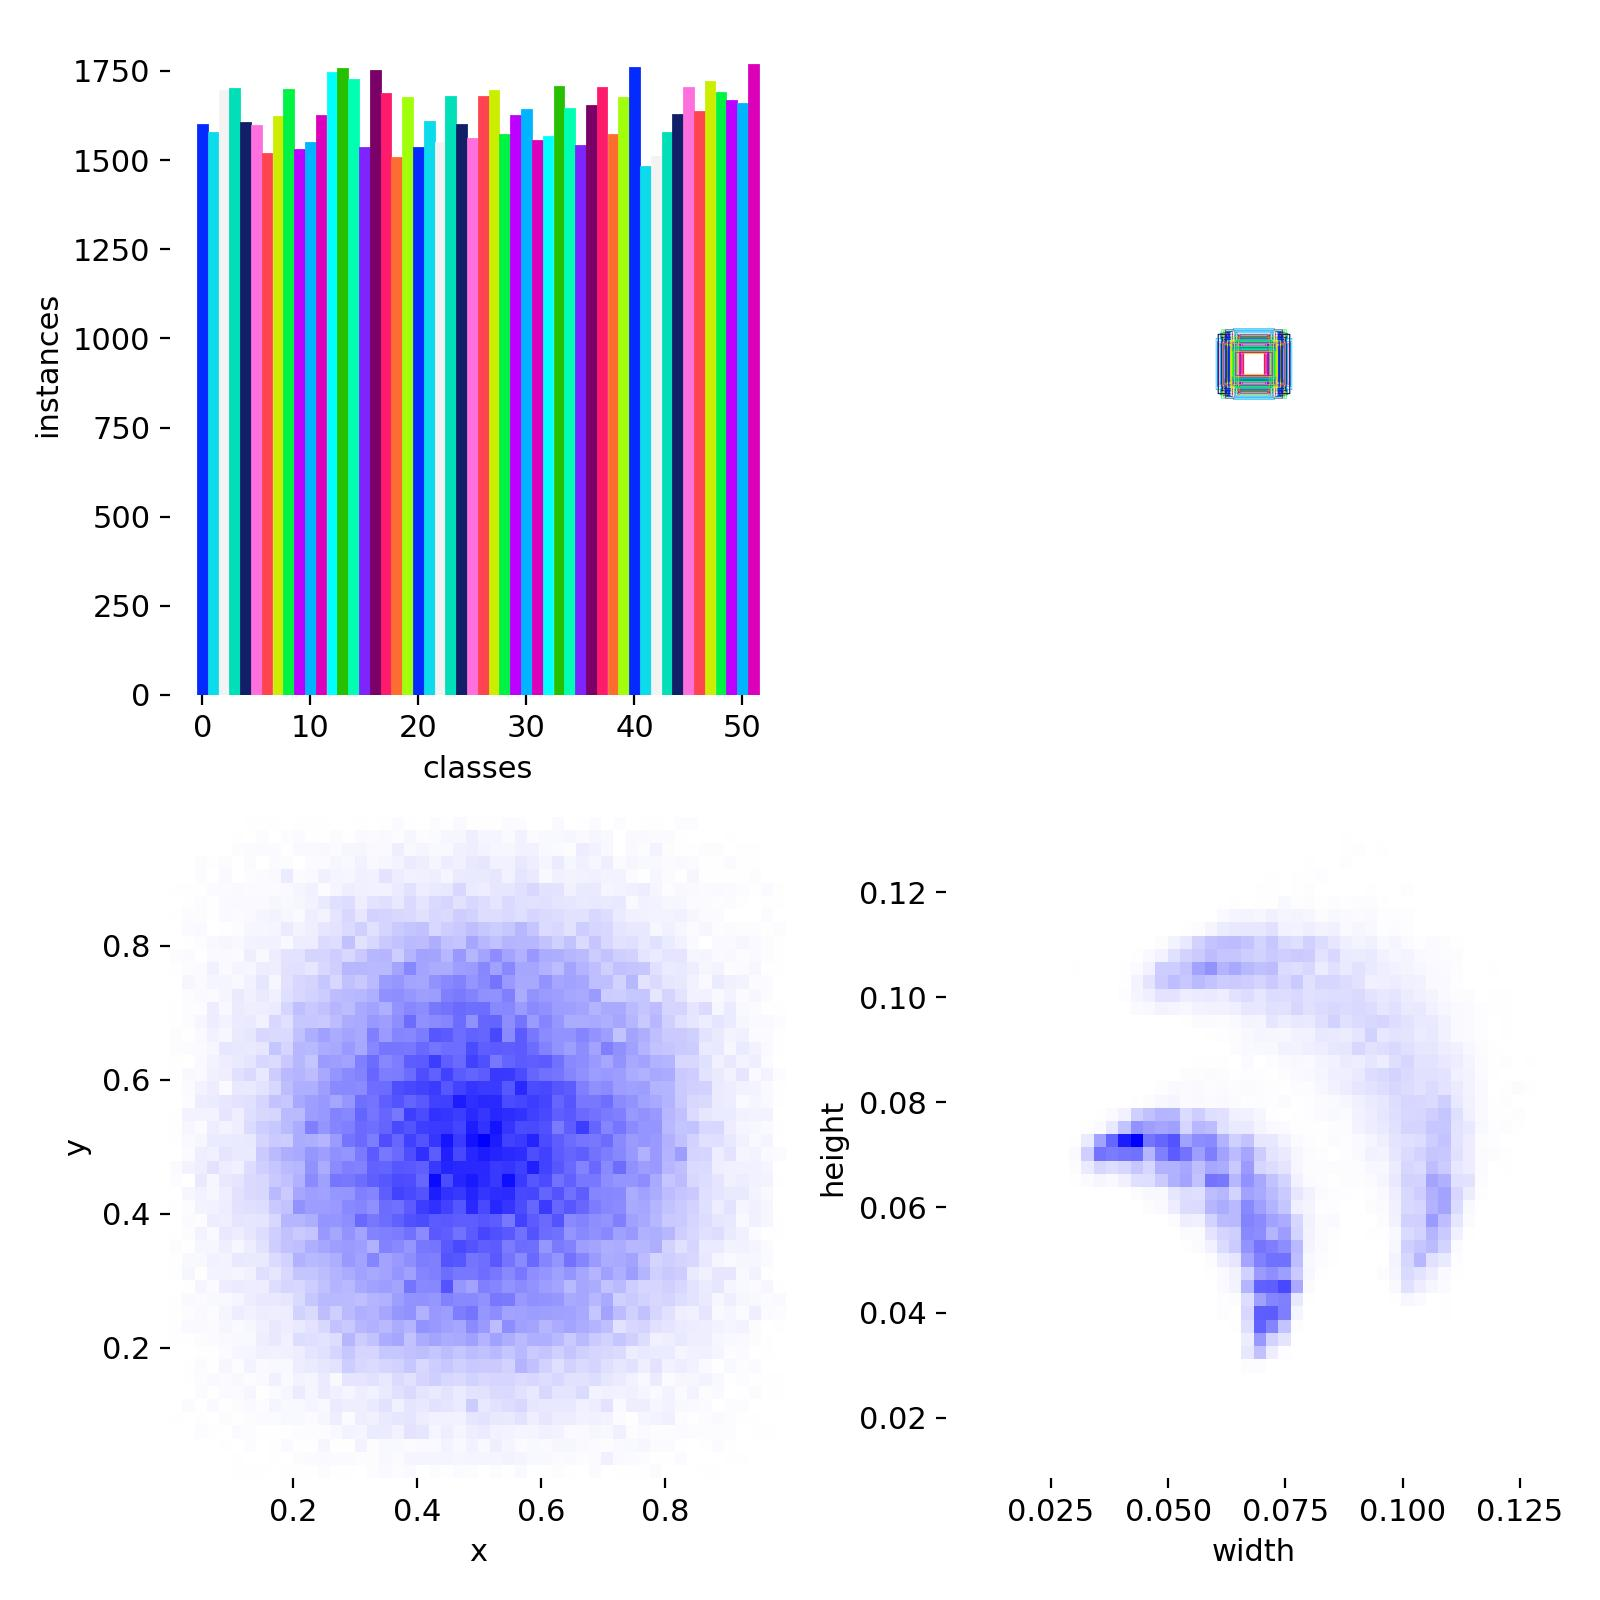

In [12]:
from IPython.display import Image, display

image_paths = [
    "/content/runs/detect/train4/confusion_matrix.png",
    "/content/runs/detect/train4/results.png",
    "/content/runs/detect/train4/BoxF1_curve.png",
    "/content/runs/detect/train4/BoxPR_curve.png",
    "/content/runs/detect/train4/labels.jpg"
]

for path in image_paths:
    print(f"Displaying: {path}")
    display(Image(filename=path))

In [20]:
!rm -rf runs/detect/train5 runs/detect/train6 runs/detect/train7 runs/detect/train8 runs/detect/train9